# **Drive mounting**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **This Project divided into 6 Parts**

### 1.   **Importing Libaries and Dataset**
### 2.   **Exploratory Data Analysis(EDA) Basic Data Understanding**
### 3.   **Textual Data Cleaning Pipeline**
### 4.   **Data visualization**
### 5.   **Machine Learning Classificaion ALgothrims using TFID**
### 6.   **Deep Learning LSTM model Using One Hot vector (One hot representation using Lemmatized Text)**


# **Importing Libaries**

In [ ]:
import pandas as pd
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import History 

import tensorflow as tf
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

from wordcloud import WordCloud, STOPWORDS


import sklearn.metrics as metrics
import nltk
from sklearn.pipeline import Pipeline
import regex as re

from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import sentiwordnet as swn, wordnet
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.stem.wordnet import WordNetLemmatizer 
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

### **Downloading NTLK Packages**

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = stopwords.words('english')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Importing Dataset**
## **Famous Fake and real news dataset (KAGGLE)**
[Dataset link](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv)

# **Dataset is divide into 2 Sub Dataset**


*   Real News Dataset (21211 Rows)
*   Fake News Dataset (23500 Rows)

* Combined Both dataset into one DATASET



In [ ]:
Real_news =pd.read_csv('gdrive/My Drive/True.csv')
Real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [ ]:
Fake_news =pd.read_csv('gdrive/My Drive/Fakenew.csv')
Fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [ ]:
Real_news['Class'] = 1
print(Real_news.shape)
Real_news.head()

(21211, 5)


,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,1


In [ ]:
Fake_news['Class'] = 0
print(Fake_news.shape)
Fake_news.head()

(23500, 5)


,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0


### **Combine Dataset**

In [ ]:
dataset = pd.concat([Real_news, Fake_news]).reset_index(drop=True)
print(dataset.shape)
dataset.head()

(44711, 5)


,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,1


# **Basic Data Analysis**
- #### Dealing with Missing value Treatment

In [ ]:
dataset.isnull().sum()

title      11
text       11
subject    22
date       22
Class       0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

title      0
text       0
subject    0
date       0
Class      0
dtype: int64

# **Textual Data Cleaning Pipeline**
### **Removal of Punctuations**
- All the punctuation marks according to the priorities should be dealt with. 
- Delete any references to other people
- Replace non alphabets and non spaces
- Replace Urls

## **Lower casing of Sentences**
Converting a word to lower case (NLP -> nlp).
Words like Book and book mean the same but when not converted to the lower case those two are represented as two different words in the vector space model (resulting in more dimensions).

## **Removal of Stop words from Sentences**
Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two documents.

## **Lemmatization of Sentences**
Lemmatization of Sentence to resolve a word to its lemma, part of speech of the word is required. This helps in transforming the word into a proper root form.

## **Tokenization into sentences**
Some of the tokenisers that can split a paragraph into sentences are given below.




In [ ]:
def data_cleaning(text):

    text = str(text)
    text = re.sub('[^a-zA-Z]', ' ', text) 
    text = re.sub('(^\s+|\s+$)', ' ', text) 
    text = re.sub("@[\w\d]+", ' ', text)           # Delete any references to other people
    text = re.sub("http:[\w\:\/\.]+",' ', text)    #replace url's
    text = re.sub('[^[A-Za-z]\s]',' ', text)      #replace non alphabets and non spaces
    text = text.lower()
    lem = WordNetLemmatizer()
    tokens = nltk.tokenize.word_tokenize(str(text))
    tokens = [token if len(token)>1 else token.replace(token,' ') for token in tokens ]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [lem.lemmatize(token) for token in tokens]
    tokens = ' '.join(tokens)
    return tokens

# **Data Preparation**

In [ ]:
def data_preparation(df):
  df["clean_title"] = df["original_text"].map(lambda x: data_cleaning(x))
  #df["clean_text"] = df["text"].map(lambda x: data_cleaning(x))

# **Main Function**

In [ ]:
df = pd.read_excel("final dataset.xlsx")
df.head()

,Unnamed: 0,id,tweet_id,name,text,created_at,user_id,hashtags,followers_count,following_count,source,original_text,score,new_label,labelss
0,0,00052eae-a354-4d0c-911f-184392464936,1.375112e+18,Bitcoin,did die today? no.,2021-03-25 15:47:15+00:00,1.314839e+18,1.0,35.0,690.0,"<a href=""http://twitter.com/download/iphone"" r...",RT @DocumentingBTC: Did #Bitcoin die today? No.,0.070325,Negative,0
1,1,00052f29-7120-48b8-ab23-c3d59e27fd38,1.366103e+18,Ripple,what was the motivation of the sec to come aft...,2021-02-28 19:06:32+00:00,2.279315e+09,0.0,16.0,176.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@JohnEDeaton1 What was the motivation of the S...,0.544773,Positive,2
2,2,00052ff7-c09e-494e-a7f7-1e04e7671b52,1.386452e+18,Bitcoin,i will give $100 to 1 follower retweet this + ...,2021-04-25 22:49:15+00:00,1.259809e+18,3.0,134.0,1968.0,"<a href=""http://twitter.com/download/android"" ...",RT @blazingBitcoin: I will give $100 to 1 foll...,0.993203,Positive,2
3,3,00053046-85a4-4862-8872-b071c6a63630,1.366712e+18,Ethereum,jump into this month is referral contest and w...,2021-03-02 11:29:47+00:00,6.400887e+07,2.0,2561.0,3813.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @sapien_network: Jump into this month's ref...,0.989107,Positive,2
4,4,0005306d-7ce3-4cf6-8c74-4c3bed84a281,1.363464e+18,Ethereum,good,2021-02-21 12:23:25+00:00,1.276558e+18,0.0,65.0,170.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Good,0.993071,Positive,2


In [ ]:
start = time.process_time()
#df = dataset

def main():
    data_preparation(df)
    #df.drop(['title','text'], axis = 1,inplace = True)
    

if __name__ == "__main__":
    main()

print(time.process_time() - start)

10.382853337


In [ ]:
df.head()

,Unnamed: 0,id,tweet_id,name,text,created_at,user_id,hashtags,followers_count,following_count,source,original_text,score,new_label,labelss,clean_title
0,0,00052eae-a354-4d0c-911f-184392464936,1.375112e+18,Bitcoin,did die today? no.,2021-03-25 15:47:15+00:00,1.314839e+18,1.0,35.0,690.0,"<a href=""http://twitter.com/download/iphone"" r...",RT @DocumentingBTC: Did #Bitcoin die today? No.,0.070325,Negative,0,rt documentingbtc bitcoin die today
1,1,00052f29-7120-48b8-ab23-c3d59e27fd38,1.366103e+18,Ripple,what was the motivation of the sec to come aft...,2021-02-28 19:06:32+00:00,2.279315e+09,0.0,16.0,176.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@JohnEDeaton1 What was the motivation of the S...,0.544773,Positive,2,johnedeaton motivation sec come ripple single ...
2,2,00052ff7-c09e-494e-a7f7-1e04e7671b52,1.386452e+18,Bitcoin,i will give $100 to 1 follower retweet this + ...,2021-04-25 22:49:15+00:00,1.259809e+18,3.0,134.0,1968.0,"<a href=""http://twitter.com/download/android"" ...",RT @blazingBitcoin: I will give $100 to 1 foll...,0.993203,Positive,2,rt blazingbitcoin give follower retweet foll...
3,3,00053046-85a4-4862-8872-b071c6a63630,1.366712e+18,Ethereum,jump into this month is referral contest and w...,2021-03-02 11:29:47+00:00,6.400887e+07,2.0,2561.0,3813.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @sapien_network: Jump into this month's ref...,0.989107,Positive,2,rt sapien network jump month referral contes...
4,4,0005306d-7ce3-4cf6-8c74-4c3bed84a281,1.363464e+18,Ethereum,good,2021-02-21 12:23:25+00:00,1.276558e+18,0.0,65.0,170.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Good,0.993071,Positive,2,good


# **PART 4: Data visualization**

*  ## **Word Clouds**
*  ## **Count Plots**



In [ ]:
Real_text_name = df.loc[df['Class'] == 1]
fake_text_name = df.loc[df['Class'] == 0]

In [ ]:
Real_clean_title = " ".join(review for review in Real_text_name.clean_title)
Real_wordcloud_desc = WordCloud(stopwords=stop_words, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(Real_clean_title)

In [ ]:
fake_clean_title = " ".join(review for review in fake_text_name.clean_title)
fake_wordcloud_desc = WordCloud(stopwords=stop_words, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(fake_clean_title)

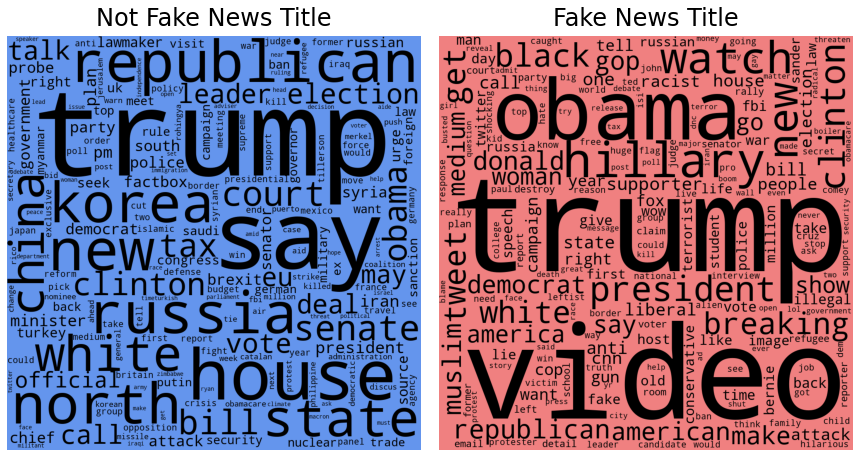

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(Real_wordcloud_desc)
ax1.axis("off")
ax1.set_title("Not Fake News Title", fontsize=24, pad=10)

ax2.imshow(fake_wordcloud_desc)
ax2.axis("off")
ax2.set_title("Fake News Title", fontsize=24, pad=10)

fig.tight_layout(pad=0)

#plt.savefig('../images/description_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Real_clean_text = " ".join(review for review in Real_text_name.clean_text)
Real_wordcloud_desc1 = WordCloud(stopwords=stop_words, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(Real_clean_text)

In [ ]:
fake_clean_text = " ".join(review for review in fake_text_name.clean_text)
fake_wordcloud_desc1 = WordCloud(stopwords=stop_words, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(fake_clean_text)

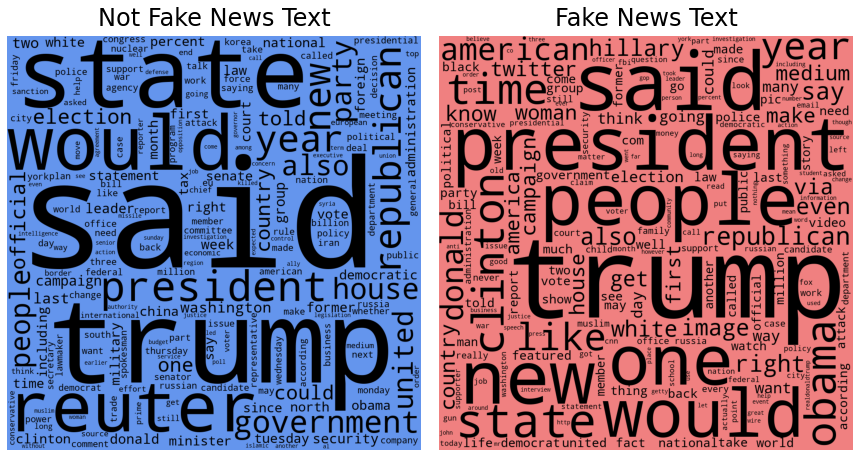

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(Real_wordcloud_desc1)
ax1.axis("off")
ax1.set_title("Not Fake News Text", fontsize=24, pad=10)

ax2.imshow(fake_wordcloud_desc1)
ax2.axis("off")
ax2.set_title("Fake News Text", fontsize=24, pad=10)

fig.tight_layout(pad=0)

#plt.savefig('../images/description_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df = df.groupby('subject').filter(lambda x : len(x)>3)
t = df[['Class','subject','clean_text']].groupby(['Class','subject']).count()
t

clean_text
Class subject                    
0     Government News        1570
      Middle-east             770
      News                   9050
      US_News                 775
      left-news              4457
      politics               6835
1     politicsNews          11220
      worldnews              9991

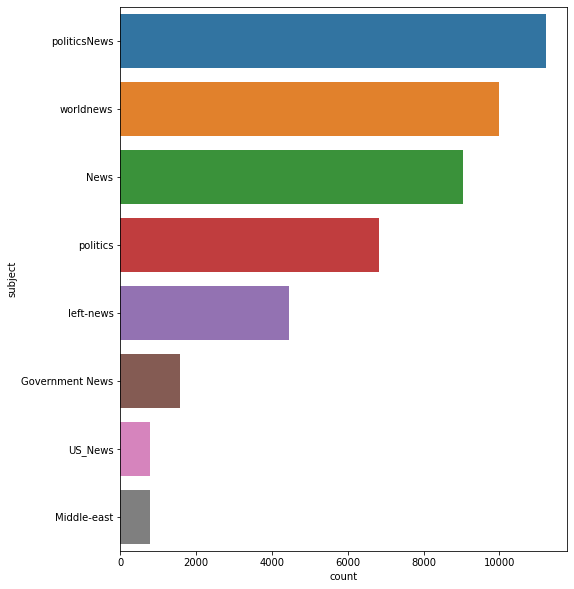

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(y="subject", data=df, order=df.subject.value_counts().iloc[:20].index)

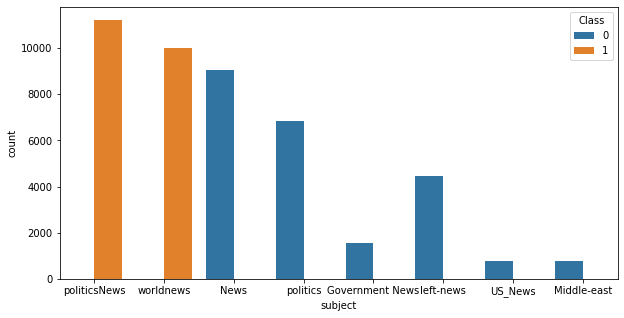

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue = "Class", data=df)

# **PART 5: Algorithm Modeling Pipeline**

### **Bag of words (TF IDF)**
- Machine learning algorithms cannot work with raw text directly. 
- Text must be converted into vectors of numbers. In natural language processing
- A common technique for extracting features from text is to place all of the words that occur in the text in a bucket. 

### **Classification algorithms**
- In machine learning use input training data to predict the likelihood that subsequent data will fall into one of the predetermined categories

### **11 Different Classification ALgorthims**
- 'LogisticRegression'
- 'DecisionTree'
- 'SVC' (Support Vector Classification)
- 'KNN' (K-nearest neighbors)
- 'RandomForest'
- 'XGBoost'
- 'MLPClassifier'
- 'MultinomialNB'
- 'LinearSVC'
- 'SGDClassifier'-
- 'AdaBoostClassifier'

### **Now we have clean text and clean title so we combine into one dataframe (final text)**

In [ ]:
df['final_text'] = df['clean_title'] + df['clean_text']
df.drop(['subject','date','clean_title','clean_text'], axis = 1,inplace = True)
df.head()

,subject,date,Class,clean_title,clean_text
10000,politicsNews,5-Apr-16,1,ted cruz win supreme court hurt mexico rel...,washington reuters republican presidential can...
10001,politicsNews,5-Apr-16,1,trump would try squeeze mexico funding border ...,washington donald trump proposed tuesday forci...
10002,politicsNews,5-Apr-16,1,obama urge congress take action corporate tax ...,washington reuters president barack obama ...
10003,politicsNews,5-Apr-16,1,alabama governor face impeachment push state l...,reuters alabama governor robert bentley face ...
10004,politicsNews,6-Apr-16,1,weakens retirement advice rule responding ...,washington reuters new rule aimed protec...


In [ ]:
df = df[10000:32000]

In [ ]:
X = df['clean_title']
y = df[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(25126,) (25126, 1)
(8376,) (8376, 1)


In [ ]:
start = time.process_time()
#Names of the various classification approaches for easy presentation of the results
names = ['LogisticRegression','MultinomialNB','KNN', 'SVC','LinearSVC','AdaBoostClassifier','SGDClassifier','DecisionTree','RandomForest','MLPClassifier','XGBoost']
scores = [] #list variable to hold classification scores
classifiers = [
    LogisticRegression(n_jobs=1, C=1e5),
    # MultinomialNB(),
    # KNeighborsClassifier(),
    # SVC(),
    # LinearSVC(C=0.05),
    # AdaBoostClassifier(n_estimators=800, random_state = 1),
    # SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None),
    # DecisionTreeClassifier(),
    # RandomForestClassifier(),
    # MLPClassifier(),
    # xgb.XGBClassifier()
    ]

for classifier in classifiers:
    pipeline = Pipeline(steps=[('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),('classifier', classifier)])
    pipeline.fit(X_train, y_train)   
    y_pred = pipeline.predict(X_test)
    scores.append(pipeline.score(X_test, y_test))
#end of pipeline
#Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score']).sort_values(by = 'Accuracy Score',
                                                                                            ascending = False)
print(time.process_time() - start)

8.456870189


### **Accurcay Score of all Algorithms**

In [ ]:
scores_df

,Classifier,Accuracy Score
0,LogisticRegression,0.90616


### **Classification Report and Confusion Matrix**

In [ ]:
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[ 529  114  102]
 [  44 2226  149]
 [  59  141 3337]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       745
           1       0.90      0.92      0.91      2419
           2       0.93      0.94      0.94      3537

    accuracy                           0.91      6701
   macro avg       0.89      0.86      0.87      6701
weighted avg       0.91      0.91      0.91      6701



In [ ]:
print("--------ROC AUC Curve Graph------------\n")
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC: %.2f \n" % pr_auc)
# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print ("ROC AUC: %.2f\n" % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

--------ROC AUC Curve Graph------------



ValueError: ignored

# **Part 6: Deep Learning LSTM model Using One Hot vector (One hot representation using Lemmatized Text)**

In [ ]:
voc_size = 5000
onehot_lemmatized_text = [one_hot(word, voc_size) for word in df.final_text]
print(len(onehot_lemmatized_text))
onehot_lemmatized_text[0]

22000


[488,
 2008,
 4667,
 1360,
 1925,
 1338,
 4429,
 2272,
 4038,
 2820,
 4184,
 454,
 2975,
 1360,
 1872,
 2611,
 1591,
 3486,
 4053,
 992,
 3351,
 210,
 3998,
 3568,
 4607,
 572,
 684,
 4790,
 136,
 3775,
 303,
 60,
 2695,
 1591,
 1368,
 639,
 4429,
 688,
 3848,
 366,
 4373,
 3229,
 3031,
 3567,
 1398,
 1016,
 688,
 794,
 1022,
 2079,
 2633,
 1612,
 3033,
 906,
 3031,
 932,
 2346,
 2323,
 2248,
 992,
 1872,
 98,
 918,
 1923,
 3309,
 2695,
 1368,
 4210,
 2358,
 2003,
 537,
 953,
 419,
 1016,
 688,
 2079,
 4180,
 2248,
 4606,
 1016,
 1244,
 4361,
 491,
 3577,
 4825,
 4410,
 4429,
 2642,
 454,
 2113,
 3600,
 4789,
 2079,
 3165,
 2789,
 1600,
 1848,
 1971,
 4667,
 132,
 2975,
 1360,
 1775,
 4244,
 3028,
 3165,
 4105,
 4110,
 2511,
 4429,
 4028,
 1441,
 4642,
 2079,
 1059,
 549,
 874,
 413,
 4165,
 1193,
 4642,
 446,
 4429,
 4191,
 2334,
 4028,
 1405,
 888,
 4586,
 2985,
 3260,
 4807,
 465,
 4429,
 3775,
 2402,
 2373,
 152,
 401,
 112,
 3568,
 112,
 842,
 1971,
 4642,
 4028,
 4429,
 2997,
 22

In [ ]:
sent_length = 400
embedded_text = pad_sequences(onehot_lemmatized_text, padding='pre', maxlen=sent_length)
print(embedded_text)

[[4701 3223 1368 ... 2406 4028  493]
 [   0    0    0 ... 1602 3065 1600]
 [   0    0    0 ... 1466 3506 4028]
 ...
 [   0    0    0 ... 4925 2017 4379]
 [2241 2451  136 ... 2405  594 2323]
 [   0    0    0 ... 2405 3614 3989]]


# **Making Model Ready for Classifiation using different layers**

In [ ]:
embedding_vector_features = 600
model2 = Sequential()
model2.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 600)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               280400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 3,280,501
Trainable params: 3,280,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embedded_text)
y_final = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')

In [ ]:
history = model2.fit(X_train, y_train,
                    epochs=5,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9972
Testing Accuracy:  0.9703


In [ ]:
y_pred = model2.predict_classes(X_test)
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuarcy: 97.03


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[3122  121]
 [  75 3282]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3243
           1       0.96      0.98      0.97      3357

    accuracy                           0.97      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.97      0.97      0.97      6600

